In [1]:
'''
Import modules
'''
%run -i '../scripts/py/imports.py'

In [2]:
'''
Setup Connection to DB
'''
engine = create_engine('postgresql+psycopg2://jessedecker@localhost:5432/BC')

In [6]:
def WriteTableToDB(df,filename):
    connection = engine.connect()
    
    # read string into geom col
    df['geom'] = df['geometry'].apply(lambda x: WKTElement(x.wkt, srid=4326))

    #drop the geometry column as it is now duplicative
    df.drop('geometry', 1, inplace=True)
    
    df.to_sql(
        filename,
        connection,
        if_exists='append',
        index=False,
        dtype={'geom': Geometry('POLYGON', srid= 4326)}
    )
    connection.close()
    

In [9]:
def GetTableFromDB(query):
    connection = engine.connect()

    gdf = gpd.GeoDataFrame.from_postgis(query, connection, geom_col='geom' )
    
    connection.close()
    
    return gdf

In [3]:
van_city_bounds = gpd.read_file('../data/vancouver/city_boundary_poly/city_boundary_poly.shp')
van_city_bounds = van_city_bounds.to_crs({'init' :'epsg:4326'})
van_city_bounds.head()

,FID,geometry
0,0,POLYGON ((-123.0234069824219 49.20128250122094...


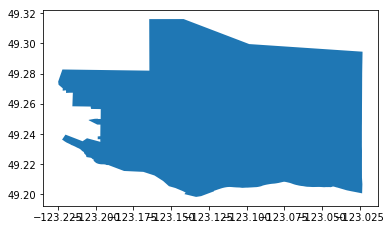

In [4]:
van_city_bounds.plot()

In [7]:
WriteTableToDB(van_city_bounds,'van_city_bounds')

In [11]:
query = 'SELECT "FID",geom FROM van_city_bounds'

tmp = GDFFromDB(query)
tmp.head()

,FID,geom
0,0,POLYGON ((-123.0234069824219 49.20128250122094...


In [ ]:
van_local_area_bounds = gpd.read_file('../data/vancouver/local_area_boundary_shp/local_area_boundary.shp')
van_local_area_bounds = van_local_area_bounds.to_crs({'init' :'epsg:4269'})
van_local_area_bounds.head()

In [ ]:
WriteTableToDB(van_local_area_bounds,'van_city_bounds')

In [10]:
query = 'SELECT "MAPID","NAME", geom FROM van_local_area_bounds'

tmp = GDFFromDB(query)
tmp.head()

,MAPID,NAME,geom
0,SUN,Sunset,POLYGON ((-123.1069641113281 49.20415878295923...
1,MP,Mount Pleasant,POLYGON ((-123.1006698608398 49.26913070678734...
2,RP,Riley Park,POLYGON ((-123.1056213378906 49.23311614990256...
3,CBD,Downtown,POLYGON ((-123.1122665405273 49.29016494750998...
4,KITS,Kitsilano,POLYGON ((-123.1376800537109 49.27531814575217...
